Nodes: 20000, Edges: 106650, Burning probability: 0.5


Computing: 100%|███████████████████████████████████████████████████████████████████████| 50/50 [03:24<00:00,  4.09s/it]


Average time for flpa: 0.4153 seconds +- 0.0429.
Average time for asyn. lpa: 1.7143 seconds +- 0.3254.
Average time for syn. lpa: 1.964 seconds +- 0.1624.
Nodes: 30000, Edges: 200390, Burning probability: 0.5


Computing: 100%|███████████████████████████████████████████████████████████████████████| 50/50 [05:06<00:00,  6.13s/it]


Average time for flpa: 0.6916 seconds +- 0.1178.
Average time for asyn. lpa: 2.7616 seconds +- 0.5672.
Average time for syn. lpa: 2.6771 seconds +- 0.1006.
Nodes: 40000, Edges: 247209, Burning probability: 0.5


Computing: 100%|███████████████████████████████████████████████████████████████████████| 50/50 [06:59<00:00,  8.38s/it]


Average time for flpa: 0.9555 seconds +- 0.1086.
Average time for asyn. lpa: 4.0091 seconds +- 0.7375.
Average time for syn. lpa: 3.4144 seconds +- 0.1604.
Nodes: 50000, Edges: 327380, Burning probability: 0.5


Computing: 100%|███████████████████████████████████████████████████████████████████████| 50/50 [10:02<00:00, 12.05s/it]


Average time for flpa: 1.3727 seconds +- 0.3735.
Average time for asyn. lpa: 5.5075 seconds +- 1.0968.
Average time for syn. lpa: 5.1685 seconds +- 0.5369.
Nodes: 60000, Edges: 422708, Burning probability: 0.5


Computing: 100%|███████████████████████████████████████████████████████████████████████| 50/50 [14:18<00:00, 17.16s/it]


Average time for flpa: 1.7431 seconds +- 0.494.
Average time for asyn. lpa: 7.0873 seconds +- 1.3021.
Average time for syn. lpa: 8.3298 seconds +- 0.4755.
Nodes: 70000, Edges: 461511, Burning probability: 0.5


Computing: 100%|███████████████████████████████████████████████████████████████████████| 50/50 [18:34<00:00, 22.28s/it]


Average time for flpa: 2.1254 seconds +- 0.3343.
Average time for asyn. lpa: 9.337 seconds +- 2.1855.
Average time for syn. lpa: 10.819 seconds +- 0.7144.
Nodes: 80000, Edges: 513379, Burning probability: 0.5


Computing: 100%|███████████████████████████████████████████████████████████████████████| 50/50 [20:50<00:00, 25.00s/it]


Average time for flpa: 2.5476 seconds +- 0.2525.
Average time for asyn. lpa: 10.8644 seconds +- 2.0455.
Average time for syn. lpa: 11.5884 seconds +- 0.576.
Nodes: 90000, Edges: 619548, Burning probability: 0.5


Computing: 100%|███████████████████████████████████████████████████████████████████████| 50/50 [18:51<00:00, 22.63s/it]


Average time for flpa: 2.7175 seconds +- 0.2302.
Average time for asyn. lpa: 10.9247 seconds +- 1.9322.
Average time for syn. lpa: 8.9908 seconds +- 0.5463.
Nodes: 100000, Edges: 639747, Burning probability: 0.5


Computing: 100%|███████████████████████████████████████████████████████████████████████| 50/50 [29:38<00:00, 35.57s/it]


Average time for flpa: 3.4781 seconds +- 0.5145.
Average time for asyn. lpa: 14.2125 seconds +- 3.1524.
Average time for syn. lpa: 17.8794 seconds +- 1.5385.


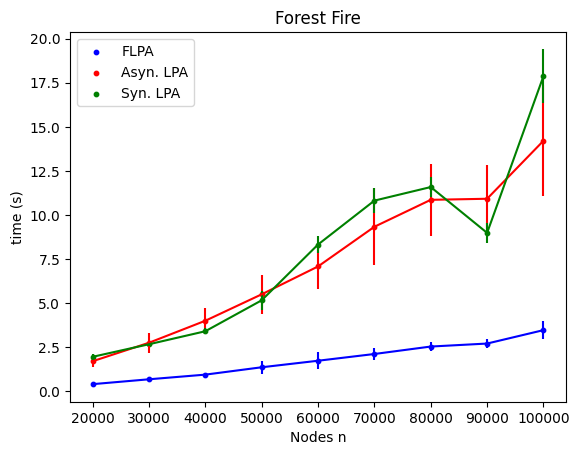

In [1]:
#Plotting the computing times for the LPA asyn., LPA syn., FLPA on a Forest Fire synthetic network
#with increasing number of nodes and fixed burning probability

import random
import networkx as nx
import matplotlib.pyplot as plt
import timeit
from tqdm import tqdm
import numpy as np

#Generating the synthetic Forest Fire networks
def forest_fire_graph(n, burning_prob):
    G = nx.DiGraph()  
    G.add_node(0)  # Initialize the first node

    for new_node in range(1, n):
        # Choosing a random node to start the "fire"
        ambassador = random.choice(list(G.nodes))
        G.add_node(new_node)
        G.add_edge(new_node, ambassador)
        
        #Propagating the fire with a burning probability
        frontier = [ambassador]
        while frontier:
            next_frontier = []
            for node in frontier:
                neighbors = list(G.neighbors(node))
                random.shuffle(neighbors)
                for neighbor in neighbors:
                    if random.random() < burning_prob:
                        G.add_edge(new_node, neighbor)
                        next_frontier.append(neighbor)
            frontier = next_frontier
    return G

#Parameters
burning_prob = 0.5  
node_counts = [20000,30000, 40000,50000, 60000,70000, 80000,90000, 100000]  

#Initializing variables
medium_t_flpa=[]
medium_t_lpa_asyn=[]
medium_t_lpa_syn=[]
std_t_flpa=[]
std_t_lpa_asyn=[]
std_t_lpa_syn=[]
j=0

for n in node_counts:
    t_iterations_lpa_asyn=[]
    t_iterations_lpa_syn=[]
    t_iterations_flpa=[]

    G_d = forest_fire_graph(n, burning_prob)
    G = G_d.to_undirected()
    #Printing parameters of the created network
    print(f"Nodes: {n}, Edges: {G.number_of_edges()}, Burning probability: {burning_prob }")

    for i in tqdm(range(50), desc="Computing"):
        #Computing time for FLPA
        start_time = timeit.default_timer() 
        communities_flpa=list(nx.community.fast_label_propagation_communities(G))
        end_time = timeit.default_timer() 
        t_iteration = end_time - start_time
        t_iterations_flpa.append(t_iteration)

        #Computing time for asyn. LPA
        start_time = timeit.default_timer() 
        communities_lpa_asyn = list(nx.community.asyn_lpa_communities(G))
        end_time = timeit.default_timer() 
        tempo_iterazione = end_time - start_time  
        t_iterations_lpa_asyn.append(tempo_iterazione)

        #Computing time for syn. LPA
        start_time = timeit.default_timer() 
        communities_lpa_syn = list(nx.community.label_propagation_communities(G))
        end_time = timeit.default_timer() 
        tempo_iterazione = end_time - start_time  
        t_iterations_lpa_syn.append(tempo_iterazione)

    #Computing average and standard deviation for each algorithm
    medium_t_flpa.append(np.mean(t_iterations_flpa))
    std_t_flpa.append(np.std(t_iterations_flpa))
    print(f"Average time for flpa: {round(medium_t_flpa[j], 4)} seconds +- {round(std_t_flpa[j], 4)}.")

    medium_t_lpa_asyn.append(np.mean(t_iterations_lpa_asyn))
    std_t_lpa_asyn.append(np.std(t_iterations_lpa_asyn))
    print(f"Average time for asyn. lpa: {round(medium_t_lpa_asyn[j], 4)} seconds +- {round(std_t_lpa_asyn[j], 4)}.")

    medium_t_lpa_syn.append(np.mean(t_iterations_lpa_syn))
    std_t_lpa_syn.append(np.std(t_iterations_lpa_syn))
    print(f"Average time for syn. lpa: {round(medium_t_lpa_syn[j], 4)} seconds +- {round(std_t_lpa_syn[j], 4)}.")
    
    j=j+1

#Plotting the results
plt.scatter(node_counts, medium_t_flpa,color='blue', label='FLPA',s=10)
plt.errorbar(node_counts, medium_t_flpa,yerr=std_t_flpa,color='blue')
plt.scatter(node_counts, medium_t_lpa_asyn,color='red', label='Asyn. LPA',s=10)
plt.errorbar(node_counts, medium_t_lpa_asyn,yerr=std_t_lpa_asyn,color='red')
plt.scatter(node_counts, medium_t_lpa_syn,color='green', label='Syn. LPA', s=10)
plt.errorbar(node_counts, medium_t_lpa_syn,yerr=std_t_lpa_syn,color='green')

plt.xlabel('Nodes n')
plt.ylabel('time (s)')
plt.title('Forest Fire')
plt.legend()
plt.savefig("ForestFire.png")
plt.show()